In [592]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import scipy
import sklearn
from matplotlib import pyplot as plt
%matplotlib inline


In [593]:
# reading data file
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

health_ind = pd.read_csv('Gestational Diabetes.csv')
health_ind.head()


,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
0,17.0,1.0,48.0,165.0,17.6,0,0
1,17.0,1.0,49.0,145.0,23.3,0,0
2,17.0,1.0,50.0,140.0,25.5,0,0
3,17.0,1.0,50.0,145.0,23.8,0,0
4,17.0,1.0,49.0,146.0,23.0,0,0


In [594]:
health_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           1012 non-null   float64
 1   Pregnancy No  1012 non-null   float64
 2   Weight        1012 non-null   float64
 3   Height        1012 non-null   float64
 4   BMI           1012 non-null   float64
 5   Heredity      1012 non-null   int64  
 6   Prediction    1012 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 55.5 KB


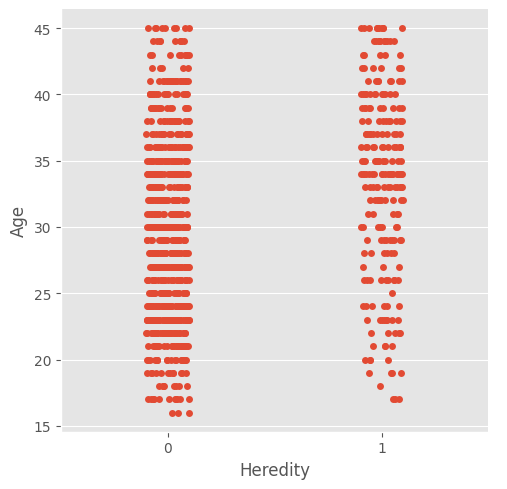

In [595]:
#plt.scatter(health_ind.Age, health_ind.Prediction, marker = '+', color = 'red')
sns.catplot(data = health_ind, x = 'Heredity', y = 'Age')
#boundary = 10
#plt.plot([boundary, boundary], [0, 1], 'g', linewidth = 6)

In [596]:
# imputation in order to replace outliers
# look at whether z score is more than 3 standard deviations away from mean
# if it is, replace with the mean of the column 
from scipy import stats
zW = np.abs(stats.zscore(health_ind['Weight']))
zBMI = np.abs(stats.zscore(health_ind['BMI']))
zH = np.abs(stats.zscore(health_ind['Height']))

threshold= 3.0
health_ind.loc[zW > threshold, 'Weight'] = health_ind['Weight'].mean()
health_ind.loc[zBMI > threshold, 'BMI'] = health_ind['BMI'].mean()
health_ind.loc[zH > threshold, 'Height'] = health_ind['Height'].mean()


print(health_ind.head())

    Age  Pregnancy No  Weight  Height   BMI  Heredity  Prediction
0  17.0           1.0    48.0   165.0  17.6         0           0
1  17.0           1.0    49.0   145.0  23.3         0           0
2  17.0           1.0    50.0   140.0  25.5         0           0
3  17.0           1.0    50.0   145.0  23.8         0           0
4  17.0           1.0    49.0   146.0  23.0         0           0


In [597]:
# define independent/dependent variables
Y = health_ind['Prediction'].values
Y = Y.astype('int')

X = health_ind.drop(labels = ['Prediction'], axis = 1)
health_ind.head()

,Age,Pregnancy No,Weight,Height,BMI,Heredity,Prediction
0,17.0,1.0,48.0,165.0,17.6,0,0
1,17.0,1.0,49.0,145.0,23.3,0,0
2,17.0,1.0,50.0,140.0,25.5,0,0
3,17.0,1.0,50.0,145.0,23.8,0,0
4,17.0,1.0,49.0,146.0,23.0,0,0


In [598]:
# split into testing and training set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)
print(X_test)



      Age  Pregnancy No  Weight  Height   BMI  Heredity
939  45.0           4.0    91.0   163.0  34.3         0
528  37.0           4.0    79.0   160.0  30.9         0
608  44.0           8.0    90.0   167.0  32.3         0
237  25.0           2.0    67.0   150.0  29.8         0
558  26.0           4.0    84.0   150.0  37.3         0
..    ...           ...     ...     ...   ...       ...
137  27.0           1.0    65.0   165.0  23.9         0
132  27.0           1.0    63.0   162.0  24.0         0
733  23.0           1.0    60.0   160.0  23.4         0
881  33.0           3.0    63.0   164.0  23.4         0
272  31.0           2.0    68.0   159.0  26.9         0

[203 rows x 6 columns]


In [611]:
# create the logistic regression model
from sklearn.linear_model import LogisticRegression
# create an instance of the model
log_model = LogisticRegression(C = 10.0)
# fit it on the data 
log_model.fit(X_train, y_train)

# now, test the model on the data and product stats
y_pred = log_model.predict(X_test)
print("test pred", X_test, y_pred)

# create heat model 
from sklearn import metrics 
accuracy_score = metrics.accuracy_score(y_test, y_pred)
print("accuracy = ", accuracy_score)
#print("recall score: ", metrics.recall_score(y_test, test_pred))
#print("precision score: ", metrics.precision_score(y_test, test_pred))


test pred       Age  Pregnancy No  Weight  Height   BMI  Heredity
939  45.0           4.0    91.0   163.0  34.3         0
528  37.0           4.0    79.0   160.0  30.9         0
608  44.0           8.0    90.0   167.0  32.3         0
237  25.0           2.0    67.0   150.0  29.8         0
558  26.0           4.0    84.0   150.0  37.3         0
..    ...           ...     ...     ...   ...       ...
137  27.0           1.0    65.0   165.0  23.9         0
132  27.0           1.0    63.0   162.0  24.0         0
733  23.0           1.0    60.0   160.0  23.4         0
881  33.0           3.0    63.0   164.0  23.4         0
272  31.0           2.0    68.0   159.0  26.9         0

[203 rows x 6 columns] [0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


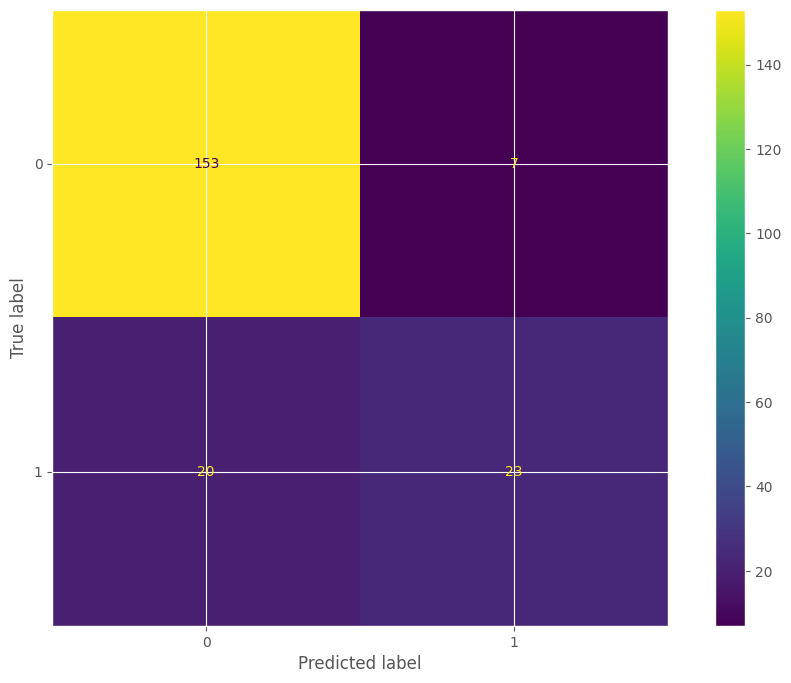

In [600]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)


cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()


In [601]:
# uses coefficient to see which independent variable has the greatest bearings on the prevalence of gestational diabetes.
weights = pd.Series(log_model.coef_[0], index = X.columns.values)
print(weights)



Age             0.050706
Pregnancy No   -0.003777
Weight          0.023557
Height         -0.019069
BMI             0.136163
Heredity        2.087435
dtype: float64


In [602]:
import csv
df = pd.DataFrame()
testy = pd.DataFrame(y_test.astype(int))
#print(y_test)
predy = pd.DataFrame(y_pred.astype(int))
#print(y_pred)
df.insert(0, column='y_test', value=testy)
print(df)
df.insert(1, column='y_pred', value = predy)

def categorize_prediction(a, b) :
    if (a != b) :
        return 'incorrect'
    else: 
        return 'correct'

df['prediction'] = df.apply(lambda x: categorize_prediction(x['y_pred'], x['y_test']), axis = 1)
df.sort_values(by = ['prediction'], inplace = True)
df.to_csv('gest_diabetes.csv', index_label=False, index = False)



     y_test
0         1
1         1
2         1
3         0
4         0
..      ...
198       0
199       0
200       1
201       0
202       0

[203 rows x 1 columns]


auc score:  0.8625726744186046


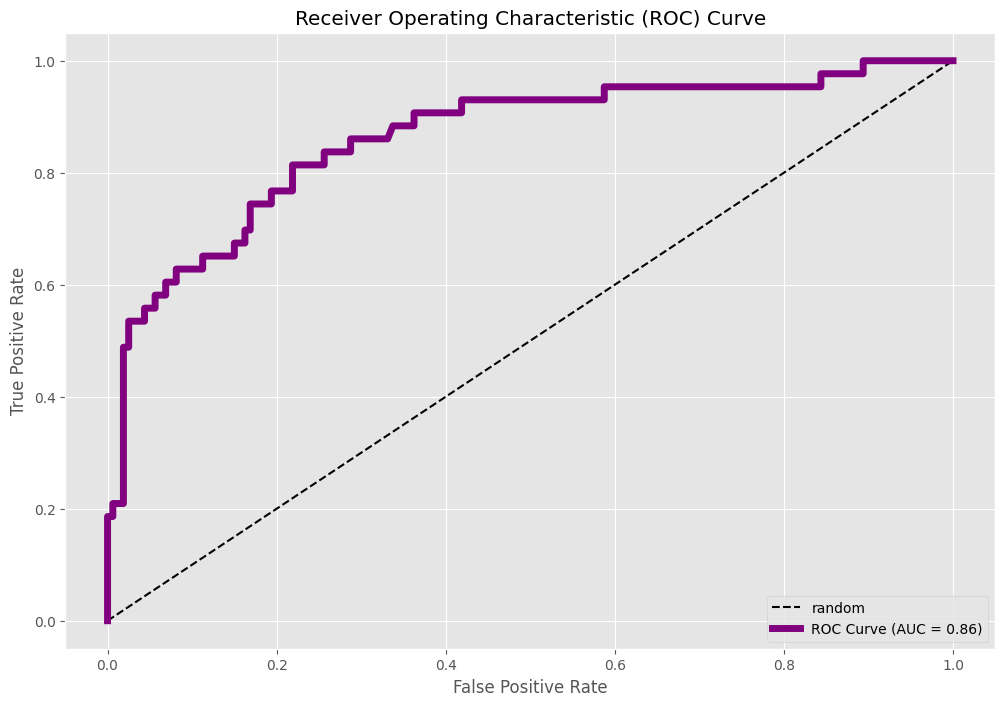

In [617]:
# Creating an ROC Curve
# An ROC curve plots the true postive rates (tpr) against the false 
# positive rate 
y_pred_probs = log_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_probs)
print('auc score: ', auc_score)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--', label = 'random')
plt.plot(fpr, tpr, color = 'purple', linewidth = 5, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



# AUC closer to 1 is better, this means that 86% probablity that the model 
# will calculate positives (1's) as being ones, and 0's as 0's.
# A higher ability to disciminate between patients with GD and those 
# without, and distinguish between the positive and negative classifiers.



In [623]:
results = health_ind['Prediction'].values
independent = health_ind[['Age', 'BMI']].values



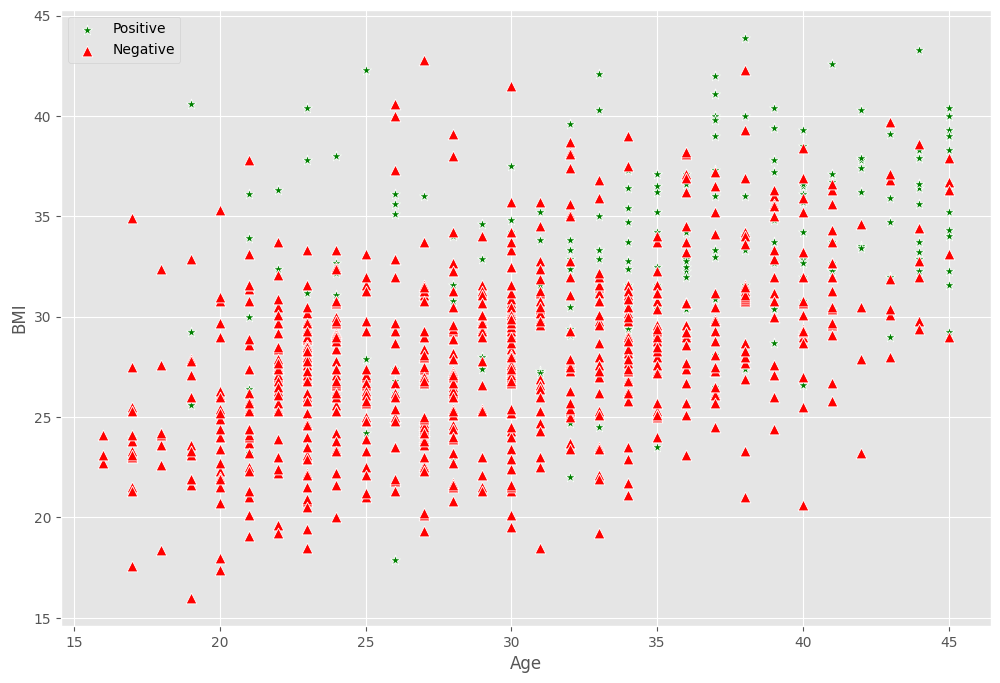

In [624]:
positive = (results == 1).reshape(1012, 1)
negative = (results == 0).reshape(1012, 1)

ax = sns.scatterplot(x =  independent[positive[:, 0], 0], y = independent[positive[:, 0], 1], marker = "*", color = 'green', s = 60)


sns.scatterplot(x =  independent[negative[:, 0], 0], y = independent[negative[:, 0], 1], marker = "^", color = 'red', s = 60)

ax.set(xlabel = "Pregnancy No", ylabel= "BMI")
ax.legend(['Positive', 'Negative'])
plt.show()

